# [AIA醫療專班-X光之氣胸偵測] Data Augmentation

![Futuristic view of human](https://img.technews.tw/wp-content/uploads/2018/01/24111147/aiacademy-624x231.jpg)

## 資料增強(data augmentation)

> 什麼是資料增強?
- 數據增強是用於產生新訓練資料的技術，通過對資料加入些許的改變，但是不變動資料的原始標籤。我們在應用資料增強時的目標，是增加我們的模型對資料的泛用性。我們的模型不斷看到新的、略微修改的資料版本，即使資料點有些許差異，但我們的模型最終應該能分辨出他們同屬於某類別。在測試時，我們大部分時候不會使用資料增強。在使用資料增強時，我們可能會看到測試精度的提高但訓練精度略有下降的情形。
- 下圖為對一張圖片做資料增強，我們得到了更多同圖片的變體。值得注意的是我們雖然對圖片做了修改，但是很明顯的我們還是能夠分辨出他的原始類別。<br>
<img src='https://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_data_augmentation_header.png' width='400px'>

> 如何對圖片做資料增強?
- 就如修圖一般，我們能夠對原始圖像加入些許的修改，如銳化、模糊、變形....等等，但應注意在修改後我們應該尚能區分出修改前後的圖片是同樣的類別。OpenCV是一開源的電腦視覺函式庫，透過OpenCV我們能夠自定義前述的圖像編修方法。而也有許多較高階的函式庫，如Keras、imgaug、OOXX...等等，已經定義好複雜的圖像編修函式，使我們能夠更快速簡便的達到資料增強的目的。

# 1.Import modules

In [0]:
import glob

import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
    
%matplotlib inline

In [0]:
sample_image = './data/train/1.2.276.0.7230010.3.1.4.8323329.3110.1517875176.151774.png'
sample_image = cv2.imread(sample_image)

In [0]:
def plot_images_side_by_side(img1, img2):
    figure, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes[0].imshow(img1)
    axes[1].imshow(img2)
    plt.show()

# 2.基本圖像編修範例-使用OpenCV

### 2.1 位移

In [0]:
def tranlate_image(image, x=50, y=50):
    # NOTE: Translating (shifting) an image is given by a NumPy matrix in
    # the form:
    #	[[1, 0, shiftX], [0, 1, shiftY]]
    # You simply need to specify how many pixels you want to shift the image
    # in the X and Y direction -- let's translate the image 25 pixels to the
    # right and 50 pixels down
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

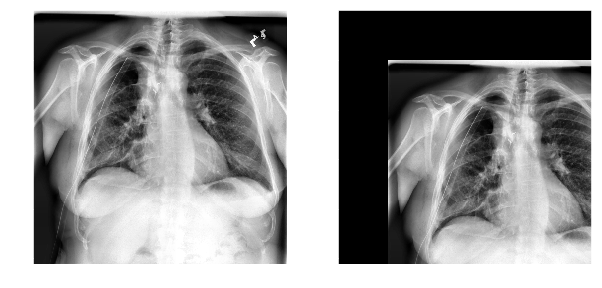

In [0]:
translated_sample_image = tranlate_image(sample_image)
plot_images_side_by_side(sample_image, translated_sample_image)

### 旋轉

In [0]:
def rotate_image(image, degree=45):
    # grab the dimensions of the image and calculate the center of the image
    (h, w) = image.shape[:2]
    (cX, cY) = (w / 2, h / 2)

    # rotate our image by 45 degrees
    M = cv2.getRotationMatrix2D((cX, cY), degree, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

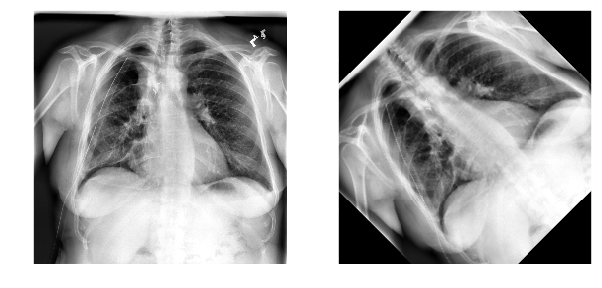

In [0]:
rotated_sample_image = rotate_image(sample_image)
plot_images_side_by_side(sample_image, rotated_sample_image)

### 縮放

In [0]:
def resize_image(image, width=100, height=100):
    # Resize our image accroding to new width and height
    return cv2.resize(image, (width, height))

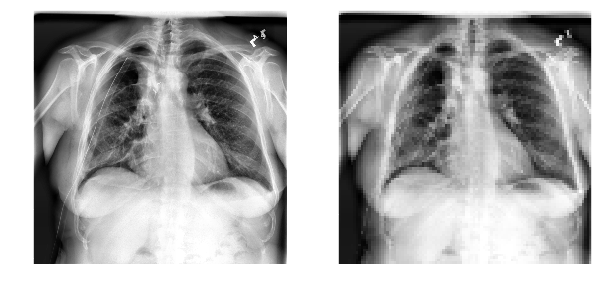

In [0]:
resized_sample_image = resize_image(sample_image)
plot_images_side_by_side(sample_image, resized_sample_image)

### 反轉

In [0]:
def flip_image(image, direction=0):
    # flip the image along both axes
    return cv2.flip(image, direction)

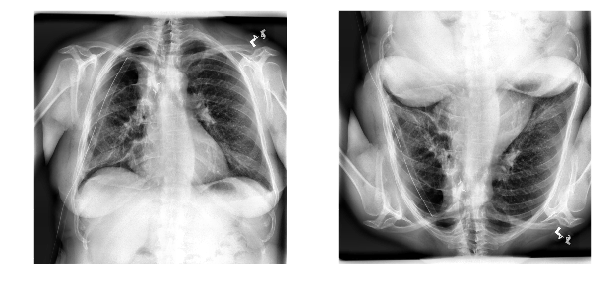

In [0]:
flipped_sample_image = flip_image(sample_image)
plot_images_side_by_side(sample_image, flipped_sample_image)

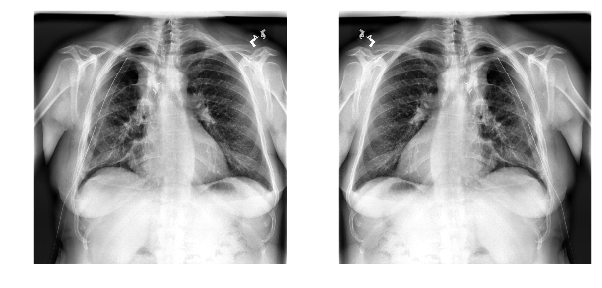

In [0]:
flipped_sample_image = flip_image(sample_image, 1)
plot_images_side_by_side(sample_image, flipped_sample_image)

### 給圖片加入所有類型的操作
同時將所有的圖像處理函式賦予給一張圖片

In [0]:
def apply(func_list, image):
    # Apply preprocessing functions to image
    if len(func_list) > 0:
        return apply(func_list[1:], func_list[0](image))
    else:
        return image

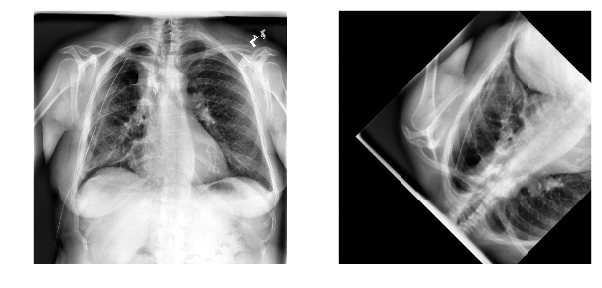

In [0]:
preprocess_funcs = [tranlate_image, rotate_image, flip_image]
preprocessed_image = apply(preprocess_funcs, sample_image)
plot_images_side_by_side(sample_image, preprocessed_image)

# 2.圖像編修範例-使用Keras
Keras是深度學習框架，其中包含了對圖片資料做資料增強的image generator模組。上面的單元我們使用openCV來做圖片的操作，包含旋轉位移等等，Keras內的Image Generator有簡單易用的API可以使用，圖像操作已經被參數化，我們僅需定義所需要的所有操作以及參數，就可以產生新的圖片。所有被定義的操作都會被一個接一個施作在圖片上，就如同上面單元最後實作的apply函數一樣。<br>

image generator的所有參數:
- featurewise_center
- samplewise_center
- featurewise_std_normalization
- samplewise_std_normalization
- zca_whitening
- zca_epsilon
- rotation_range
- width_shift_range
- height_shift_range
- brightness_range
- shear_range
- zoom_range
- channel_shift_range
- fill_mode
- cval
- horizontal_flip
- vertical_flip
- rescale
- preprocessing_function
- data_format
- validation_split
- dtype

<a alt='https://keras.io/preprocessing/image/'>Keras image generator 官方API</a>

In [0]:
from keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
output_dir = 'data/keras_image_aug'
file_name_prefix = 'keras_image_aug'

In [0]:
sample_image = np.expand_dims(sample_image, axis=0)

In [0]:
# Define preprocessing functions for data augmentation
aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1,
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2,
                         horizontal_flip=True, 
                         fill_mode="nearest"
                         )
#if your data has image and mask as input and output, you should set their generator same seed and argument.

# Total number of augmented image
total = 0
# Create image generator
imageGen = aug.flow(sample_image, 
                    batch_size=1, 
                    save_to_dir=output_dir,
                    save_prefix=file_name_prefix, 
                    save_format="jpg")

# loop over examples from our image data augmentation generator
for image in imageGen:
    # increment our counter
    total += 1
    # if we have reached 5 examples, break from the loop
    if total == 5:
        break

In [0]:
# list all files that are in the output folder
!ls data/keras_image_aug

keras_image_aug_0_2743.jpg  keras_image_aug_0_9129.jpg
keras_image_aug_0_3557.jpg  keras_image_aug_0_9351.jpg
keras_image_aug_0_4573.jpg


### Keras image generator產生之結果:

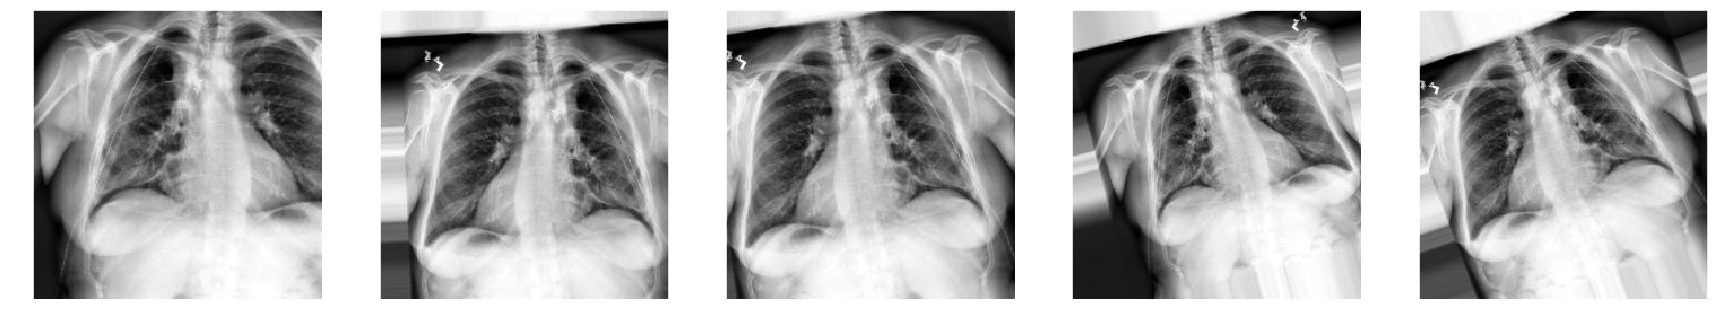

In [0]:
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
for i, image_path in enumerate(glob.glob('{}/*'.format(output_dir))):
    image = cv2.imread(image_path)
    axes[i].imshow(image)
plt.show()

# 3.高級圖像編修範例-使用Albumentations
> Albumentations的圖像操作範例
- 像素操作範例<br><img width='500px' src='https://camo.githubusercontent.com/fd2405ab170ab4739c029d7251f5f7b4fac3b41c/68747470733a2f2f686162726173746f726167652e6f72672f776562742f62642f6e652f72762f62646e6572763563746b75646d73617a6e687734637273646669772e6a706567'>
- 變形操作範例<br><img width='500px' src='https://camo.githubusercontent.com/88e6cb57bed568473e99ee1addefc81865263390/68747470733a2f2f686162726173746f726167652e6f72672f776562742f31692f66692f777a2f31696669777a79306c78657463346e776a7673732d37316e6b77302e6a706567'>

> ### albumentations API簡述
Albumentations是一更加高等的圖像處理函式庫，基於numpy, OpenCV, imgaug..等等函式庫，有著複雜的圖像處理函式，如顏色處理、高級變形....等等，但卻非常簡單易用。同時Albumentations更進一步提供圖像處理時函式的隨機性，使得每次圖像增強時所使用的函式是隨機性的，添增了許多可變性，非常的強大。<br>albumentations中的圖像操作函式有許多是有相同目的的，例如圖像的變形、模糊化就各自可分為數種不同的演算法。假如我們想要在圖樣增強時不限於使用單一的圖像操作函式，只要使用"OneOf"就可以隨機性的從列出的所有選項中挑出一個。使用"Compose"則能夠幫助我們，合成所有的圖像操作函數。


> ### albumentations圖像操作函數
- Blur
- CLAHE
- ChannelDropout
- ChannelShuffle
- CoarseDropout
- Cutout
- FromFloat
- GaussNoise
- GaussianBlur
- HueSaturationValue
- IAAAdditiveGaussianNoise
- IAAEmboss
- IAASharpen
- IAASuperpixels
- ISONoise
- InvertImg
- JpegCompression
- MedianBlur
- MotionBlur
- Normalize
- RGBShift
- RandomBrightness
- RandomBrightnessContrast
- RandomContrast
- RandomFog
- RandomGamma
- RandomRain
- RandomShadow
- RandomSnow
- RandomSunFlare
- Solarize
- ToFloat
- ToGray

<a alt='https://github.com/albu/albumentations'>albumentations Github repo</a>

In [0]:
!pip install albumentations

    100% |████████████████████████████████| 22.1MB 2.5MB/s 


## Import Preprocessing classes

In [0]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue, HorizontalFlip, 
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

## 使用OneOf

### 隨機模糊

In [0]:
def random_blur(p=1.):
    return Compose([
        OneOf([
            Blur(),
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
            MotionBlur(),
            MedianBlur()
        ], p=1)], p=p)

aug_blur = random_blur()

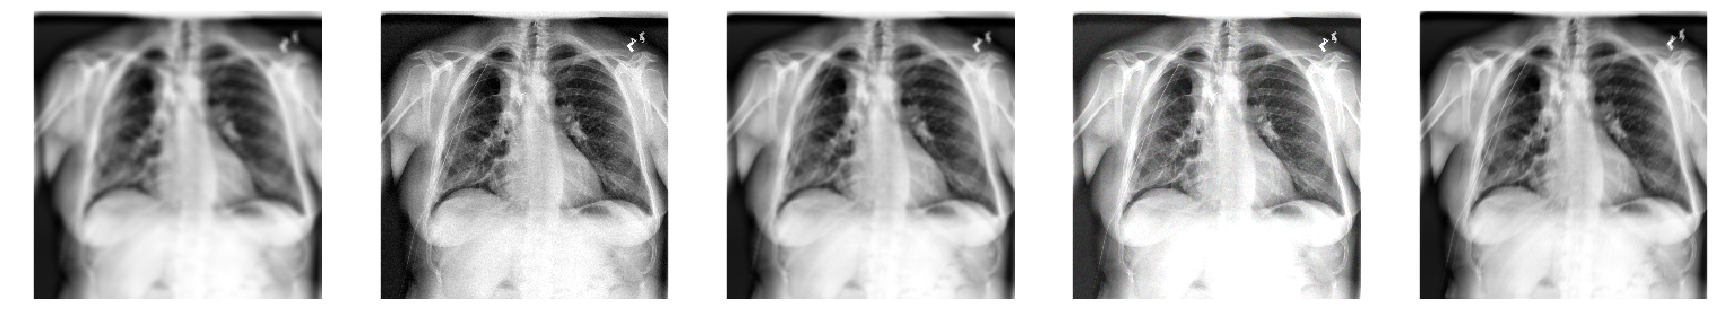

In [0]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))
for i in range(5):
    _blurred = aug_blur(image=sample_image[0])['image']
    axes[i].imshow(_blurred)
plt.show()

### 隨機旋轉

In [0]:
def random_rotation(p=1.):
    return Compose([
        OneOf([
            HorizontalFlip(),
            ShiftScaleRotate(),
            RandomRotate90(),
            Flip()
        ], p=1)], p=p)

aug_rot = random_rotation()

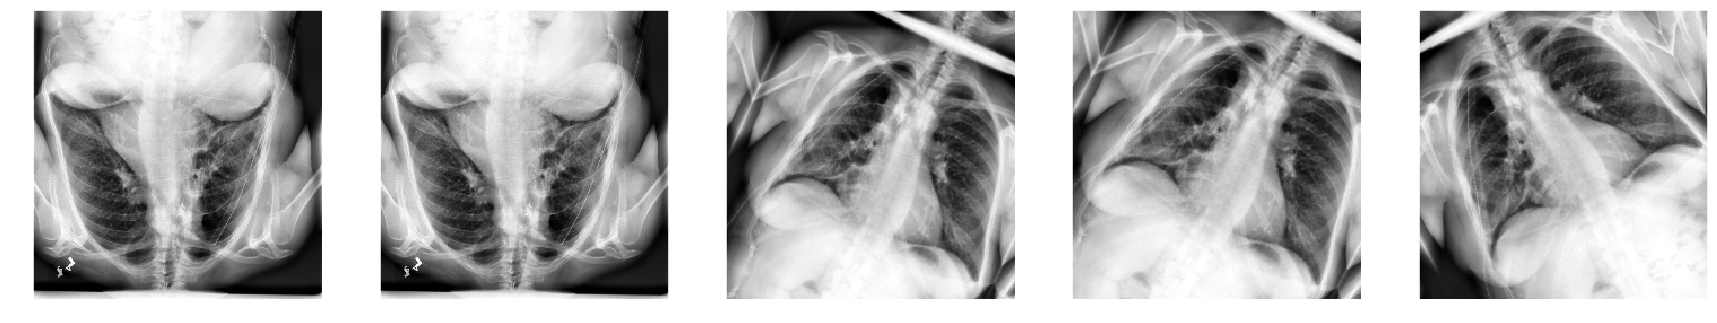

In [0]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))
for i in range(5):
    _blurred = aug_rot(image=sample_image[0])['image']
    axes[i].imshow(_blurred)
plt.show()

## Compose
將所有的圖像處理結果合成

In [0]:
def augment_flips_color(p=1.):
    return Compose([
        OneOf([
            HorizontalFlip(),
            ShiftScaleRotate(),
            RandomRotate90(),
            Flip()
        ], p=0.5),
        OneOf([
            Blur(),
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
            MotionBlur(),
            MedianBlur()
        ], p=0.5),
        OneOf([
            OpticalDistortion(),
            GridDistortion(),
            IAAPiecewiseAffine(),
        ], p=0.5),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),            
        ], p=0.5),
        HueSaturationValue(p=0.5),
        ], p=p)

aug = augment_flips_color()

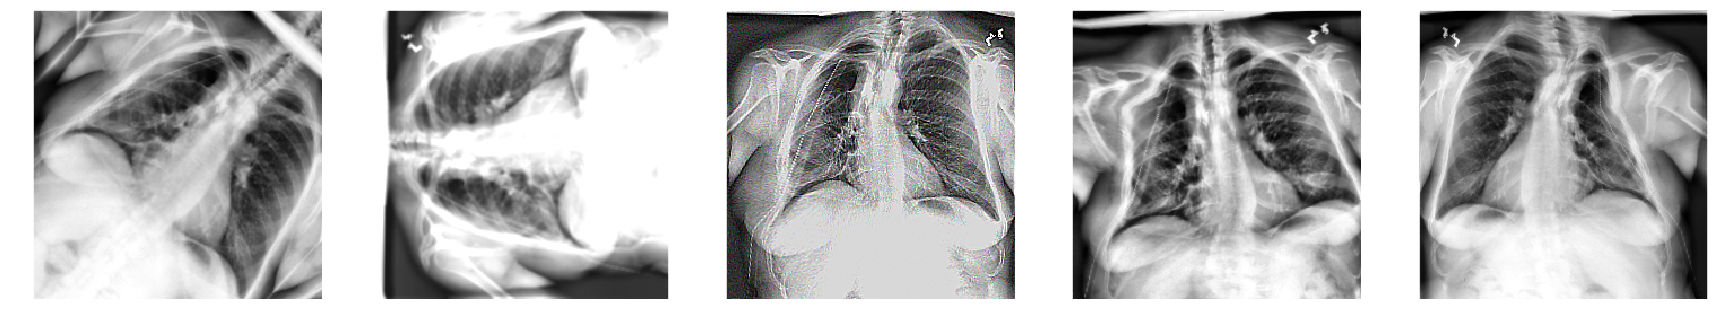

In [0]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))
for i in range(5):
    _blurred = aug(image=sample_image[0])['image']
    axes[i].imshow(_blurred)
plt.show()